In [ ]:
# Loaading Data
import matplotlib.pyplot as plt
from PIL import Image 

train_dir = "training_data_pytorch/training_data_pytorch"
name = "/10.jpeg"
input = train_dir + name

img = Image.open(input)

validation_dir = "validation_data_pytorch/validation_data_pytorch"
name = "/32.jpeg"
input2 = validation_dir + name

img2 = Image.open(input2)

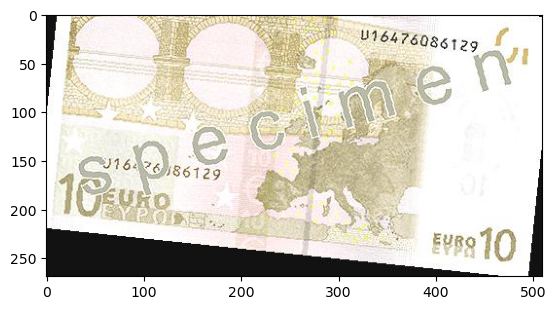

In [66]:
# Preprocessing Data
from torch.utils.data import Dataset, DataLoader
import pandas
from torchvision import transforms
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
import pandas as pd
from PIL import Image

train_csv_file = "training_labels.csv"
validation_csv_file='validation_labels.csv'

validation_data_name = pd.read_csv(validation_csv_file)
validation_data_name.head()

train_image_name = train_dir +  '/'+ train_data_name.iloc[10, 2]

image = Image.open(train_image_name)
plt.imshow(image)
plt.show()

In [ ]:
# Create your own dataset object

class Dataset(Dataset):

    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):
        
        # Image directory
        self.data_dir=data_dir
        
        # The transform is goint to be used on image
        self.transform = transform
        
        # Load the CSV file contians image info
        self.data_name= pd.read_csv(csv_file)
        
        # Number of images in dataset
        self.len=self.data_name.shape[0] 
    
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        # Image file path
        img_name=self.data_dir + self.data_name.iloc[idx, 2]
        
        # Open image file
        image = Image.open(img_name)
        
        # The class label for the image
        y = self.data_name.iloc[idx, 3]
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y


train_dataset = Dataset(csv_file=train_csv_file
                        , data_dir='training_data_pytorch/training_data_pytorch')
validation_data = Dataset(csv_file=validation_csv_file
                          , data_dir='validation_data_pytorch/validation_data_pytorch')

In [63]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
composed = transforms.Compose([transforms.Resize((224, 224)),
                               transforms.ToTensor(), transforms.Normalize(mean, std)])
composed

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)